# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,228,105,54,106,215,68,10,208,32,24,166,217,640,218,69,14,23,189,199
1,724,94,45,85,160,63,10,158,43,20,157,174,367,162,68,1,6,189,199
2,238,100,55,101,189,57,10,222,30,25,177,225,731,211,71,7,17,188,197
3,820,87,38,71,123,53,8,137,49,18,127,158,277,145,75,0,9,181,186
4,746,91,42,66,142,58,9,134,50,18,142,163,268,164,69,6,5,191,197
5,360,108,52,109,182,55,12,216,31,24,171,229,687,214,72,10,28,189,201
6,803,93,47,84,205,71,7,176,36,21,152,190,476,201,70,7,19,198,201
7,815,81,45,68,154,69,22,151,45,19,147,186,335,186,88,1,10,180,185
8,387,90,47,85,145,58,9,152,44,19,155,175,345,184,73,4,2,186,197
9,500,101,56,100,204,62,12,227,30,25,178,231,757,204,73,0,11,186,197


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.183971,93.517304,44.737705,81.668488,167.757741,61.599271,8.626594,168.344262,41.081967,20.533698,147.805100,188.300546,437.420765,174.08561,72.788707,6.367942,12.774135,188.706740,195.353370
std,239.438426,8.282984,6.074391,15.721322,33.371684,8.338181,5.000447,33.471143,7.798010,2.623805,14.414114,32.058893,178.983575,31.95329,7.758147,4.873149,9.018836,6.203335,7.529922
min,2.000000,76.000000,33.000000,40.000000,109.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,226.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.000000,316.000000,149.00000,68.000000,2.000000,6.000000,184.000000,189.000000
50%,411.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.000000,361.000000,173.00000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,630.000000,100.000000,49.000000,96.000000,193.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,196.00000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,182.000000,320.000000,1018.000000,264.00000,135.000000,22.000000,40.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn import preprocessing

# 1. таргеты уже выделены из выборки, это делать не нужно
# 2. значения в X числовые, то есть нет необходимости применять one hot encoding или Multi encoding
# 3. Nanов не имеется, не будем применять fillna / dropna
# 4. остается сделать только Scaling

normalizer = preprocessing.StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
import scikitplot as skplt
import sklearn

logregression = sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
parameters = {'C': np.linspace(0.01, 1, 50), 'penalty':  ['l1', 'l2']}
bestLogregressionCv = sklearn.model_selection.RandomizedSearchCV(logregression, parameters, scoring='accuracy', cv=5)
bestLogregressionCv.fit(X_train, y_train)
print(bestLogregressionCv.best_params_)

{'penalty': 'l1', 'C': 0.8787755102040816}


In [8]:
newlogregression = sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=1.0, penalty='l1')
newlogregression.fit(X_train, y_train)

pred = newlogregression.predict(X_test)
print('accuracy_score: ', sklearn.metrics.accuracy_score(pred, y_test))
print('f1_score: ', sklearn.metrics.f1_score(pred, y_test, average='weighted'))

accuracy_score:  0.7744107744107744
f1_score:  0.7821465860691464


Для сравнения MinMaxScaler:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
normalizer = preprocessing.MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)
newlogregression = sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=1.0, penalty='l1')
newlogregression.fit(X_train, y_train)

pred = newlogregression.predict(X_test)
print('accuracy_score: ', sklearn.metrics.accuracy_score(pred, y_test))
print('f1_score: ', sklearn.metrics.f1_score(pred, y_test, average='weighted'))

accuracy_score:  0.6498316498316499
f1_score:  0.6587397367539213


Видно, что точность для данных, использующих другой Scaling, гораздо ниже

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

normalizer = preprocessing.StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

newlogregression = sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=1.0, penalty='l1')
newlogregression.fit(X_train, y_train)

pred = newlogregression.predict(X_test)

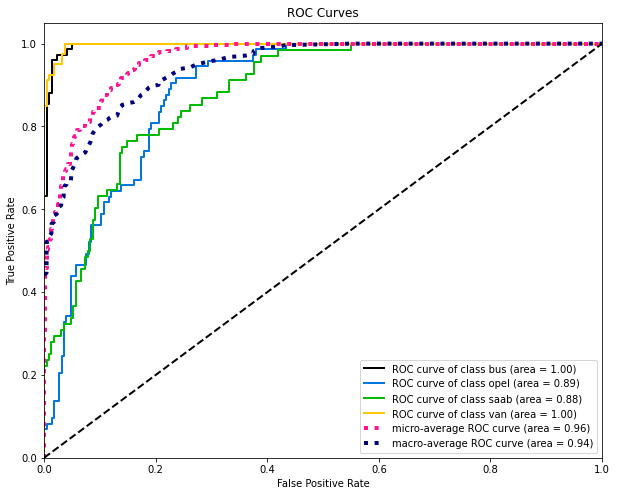

In [25]:
pred_proba = newlogregression.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, pred_proba, figsize=(10, 8))

In [9]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = X_train.shape[1])

componentsPca = pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

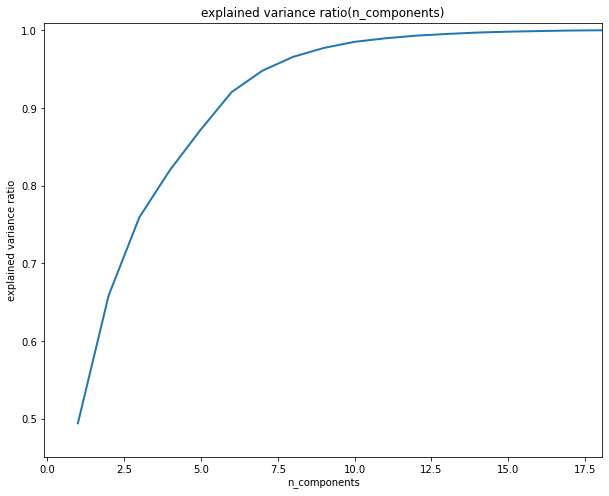

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(range(1, exp_var_cumul.shape[0] + 1), exp_var_cumul, lw=2)
plt.xlim([-0.1, 18.05])
plt.ylim([0.45, 1.01])
plt.xlabel('n components')
plt.ylabel('explained variance ratio')
plt.title('explained variance ratio(n_components)')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [36]:
exp_var_cumul[11]

0.9930711775775467

Больше 99 процентов, подходит 

Да, необходимо нормализовать данные для лучшего результата:

In [62]:
pca = PCA(n_components = 12)
X_train_pca = componentsPca.fit_transform(X_train)
X_test_pca = componentsPca.fit_transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [71]:
bestLogregressionCv.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=500,
                                                multi_class='multinomial',
                                                n_jobs=None, penalty='l2',
                                                random_state=None,
                                                solver='saga', tol=0.001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=...
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.777755

In [72]:
print(bestLogregressionCv.best_params_)

{'penalty': 'l1', 'C': 0.5959183673469388}


In [74]:
newlogregression = sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=0.596, penalty='l1')
newlogregression.fit(X_train, y_train)

pred = newlogregression.predict(X_test)
print('accuracy_score: ', sklearn.metrics.accuracy_score(pred, y_test))
print('f1_score: ', sklearn.metrics.f1_score(pred, y_test, average='weighted'))

accuracy_score:  0.7946127946127947
f1_score:  0.7982213208328702


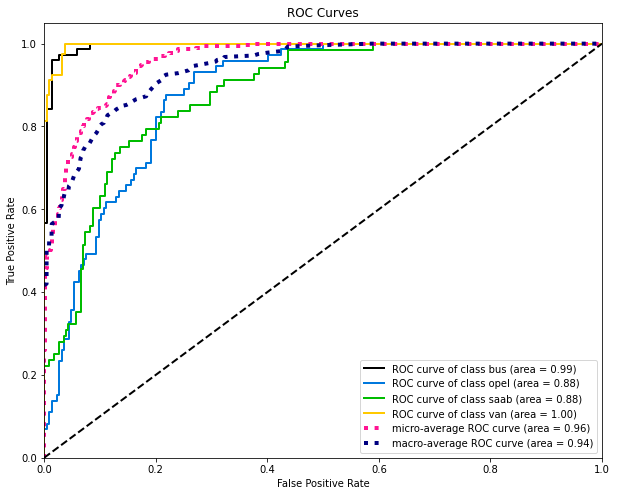

In [75]:
pred_proba = newlogregression.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, pred_proba, figsize=(10, 8))

Точность немного улучшилась

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [84]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth': np.linspace(1, 10, 10)}
tree = DecisionTreeClassifier()
bestTreeCv = sklearn.model_selection.RandomizedSearchCV(tree, parameters, scoring='accuracy', cv=5)
bestTreeCv.fit(X_train, y_train)

print(bestTreeCv.best_params_)

{'max_depth': 6.0}


In [88]:
newtree = DecisionTreeClassifier(max_depth=6.0)
newtree.fit(X_train, y_train)

pred = newtree.predict(X_test)
print('accuracy_score: ', sklearn.metrics.accuracy_score(pred, y_test))
print('f1_score: ', sklearn.metrics.f1_score(pred, y_test, average='weighted'))

accuracy_score:  0.6397306397306397
f1_score:  0.6369556720607886


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [89]:
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm_notebook

Логистическая регрессия:

In [109]:
f1_history = []
accuracy_score_history = []

f1_history_test = []
accuracy_score_history_test = []
for i in tqdm_notebook(range(1, 51)):
    bagging = BaggingClassifier(base_estimator=newlogregression, n_estimators=i, bootstrap=True, random_state=81, max_samples=100)
    bagging.fit(X_train, y_train)
    pred = bagging.predict(X_train)
    f1_history.append(sklearn.metrics.f1_score(y_train, pred, average='weighted'))
    accuracy_score_history.append((sklearn.metrics.accuracy_score(y_train, pred)))
    
    pred = bagging.predict(X_test)
    f1_history_test.append(sklearn.metrics.f1_score(y_test, pred, average='weighted'))
    accuracy_score_history_test.append(sklearn.metrics.accuracy_score(y_test, pred))

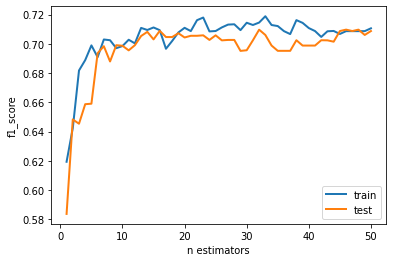

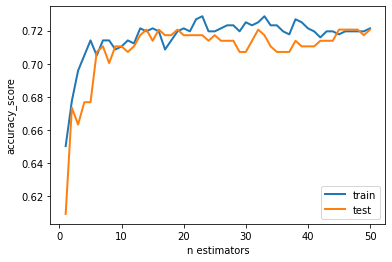

In [110]:
plt.plot(range(1, len(f1_history) + 1), f1_history, lw=2, label='train')
plt.plot(range(1, len(f1_history) + 1), f1_history_test, lw=2, label='test')
plt.xlabel('n estimators')
plt.ylabel('f1_score')
plt.legend()
plt.show()

plt.plot(range(1, len(f1_history) + 1), accuracy_score_history, lw=2, label='train')
plt.plot(range(1, len(f1_history) + 1), accuracy_score_history_test, lw=2, label='test')
plt.xlabel('n estimators')
plt.ylabel('accuracy_score')
plt.legend()
plt.show()

Решающие деревья:

In [111]:
f1_history = []
accuracy_score_history = []

f1_history_test = []
accuracy_score_history_test = []
for i in tqdm_notebook(range(1, 51)):
    bagging = BaggingClassifier(base_estimator=newtree, n_estimators=i, bootstrap=True, random_state=81, max_samples=100)
    bagging.fit(X_train, y_train)
    pred = bagging.predict(X_train)
    f1_history.append(sklearn.metrics.f1_score(y_train, pred, average='weighted'))
    accuracy_score_history.append((sklearn.metrics.accuracy_score(y_train, pred)))
    
    pred = bagging.predict(X_test)
    f1_history_test.append(sklearn.metrics.f1_score(y_test, pred, average='weighted'))
    accuracy_score_history_test.append(sklearn.metrics.accuracy_score(y_test, pred))

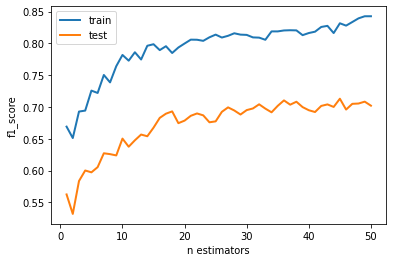

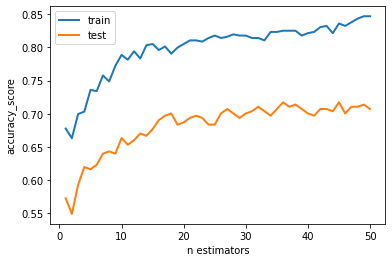

In [112]:
plt.plot(range(1, len(f1_history) + 1), f1_history, lw=2, label='train')
plt.plot(range(1, len(f1_history) + 1), f1_history_test, lw=2, label='test')
plt.xlabel('n estimators')
plt.ylabel('f1_score')
plt.legend()
plt.show()

plt.plot(range(1, len(f1_history) + 1), accuracy_score_history, lw=2, label='train')
plt.plot(range(1, len(f1_history) + 1), accuracy_score_history_test, lw=2, label='test')
plt.xlabel('n estimators')
plt.ylabel('accuracy_score')
plt.legend()
plt.show()

Для решающих деревьев можно взять ансамбль из 30-35, далее точность на тестовой выборке существенно не повышается.
Для логистической регресии 10.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [113]:
from sklearn.ensemble import RandomForestClassifier

f1_history = []
accuracy_score_history = []

f1_history_test = []
accuracy_score_history_test = []
for i in tqdm_notebook(range(1, 51)):
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(X_train, y_train)
    pred = forest.predict(X_train)
    f1_history.append(sklearn.metrics.f1_score(y_train, pred, average='weighted'))
    accuracy_score_history.append((sklearn.metrics.accuracy_score(y_train, pred)))
    
    pred = forest.predict(X_test)
    f1_history_test.append(sklearn.metrics.f1_score(y_test, pred, average='weighted'))
    accuracy_score_history_test.append(sklearn.metrics.accuracy_score(y_test, pred))

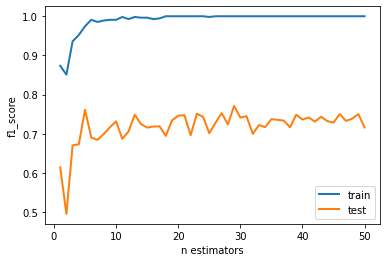

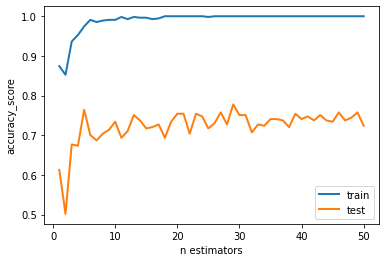

In [114]:
plt.plot(range(1, len(f1_history) + 1), f1_history, lw=2, label='train')
plt.plot(range(1, len(f1_history) + 1), f1_history_test, lw=2, label='test')
plt.xlabel('n estimators')
plt.ylabel('f1_score')
plt.legend()
plt.show()

plt.plot(range(1, len(f1_history) + 1), accuracy_score_history, lw=2, label='train')
plt.plot(range(1, len(f1_history) + 1), accuracy_score_history_test, lw=2, label='test')
plt.xlabel('n estimators')
plt.ylabel('accuracy_score')
plt.legend()
plt.show()

Исходя из полученных результатов, 10 моделей вполне достаточно.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

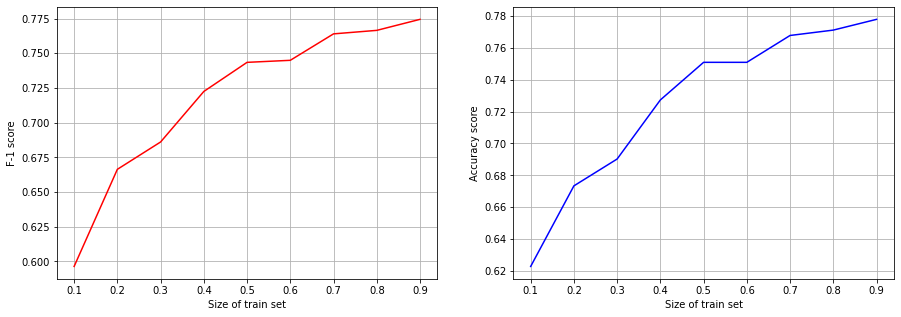

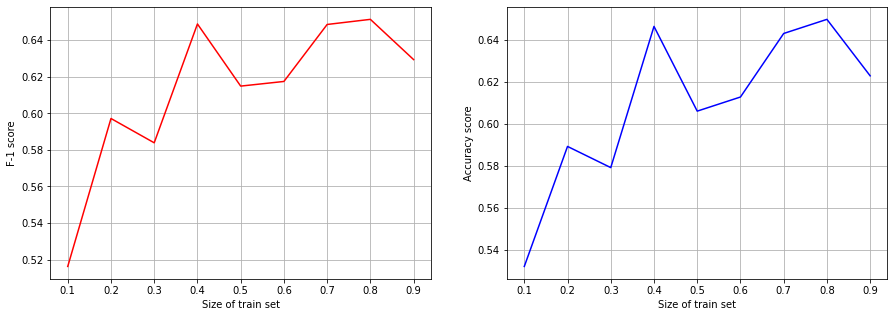

/home/valshch/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/valshch/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/valshch/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


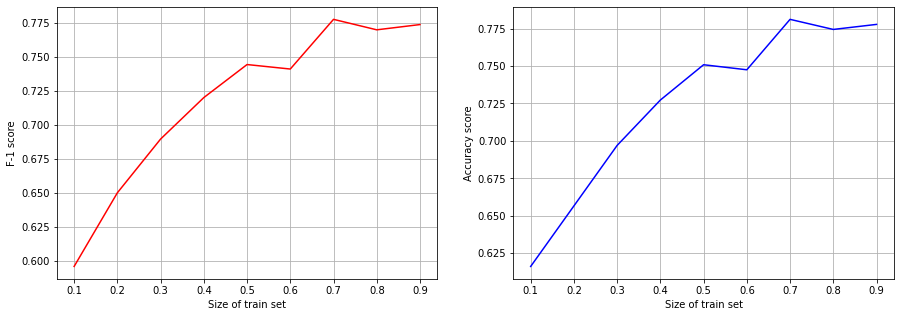

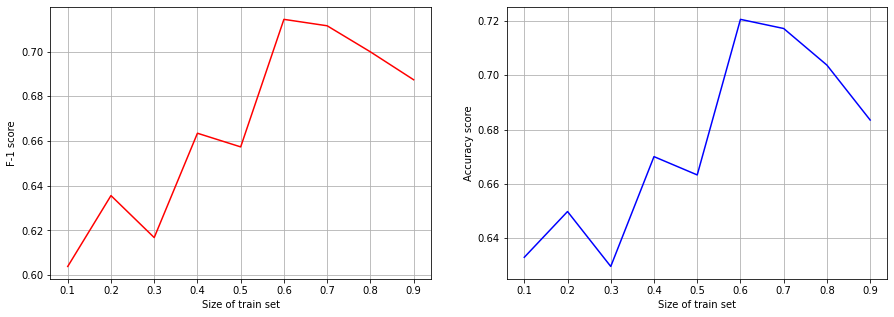

In [161]:
X_train_split = []
y_train_split = []

for i in range(1,10):
    X_train_split.append(X_train[0:int(0.1*len(X_train) + 1)*i])
    y_train_split.append(y_train[0:int(0.1*len(X_train) + 1)*i])

models = [newlogregression, 
          newtree,
          BaggingClassifier(newlogregression, n_estimators = 20, bootstrap = True),
          BaggingClassifier(newtree, n_estimators = 10, bootstrap = True )]
    

for model in models:
    f1_scores = []
    accs = []
    for i in range(9):
        model.fit(X_train_split[i], y_train_split[i])
        temp_f1 = sklearn.metrics.f1_score(y_test, model.predict(X_test), average='weighted')
        temp_acc = sklearn.metrics.accuracy_score(y_test, model.predict(X_test))
        f1_scores.append(temp_f1)
        accs.append(temp_acc)
        
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.plot(np.linspace(0.1,0.9,9), f1_scores, lw=1.5, color = 'red')
    plt.xlabel('Size of train set')
    plt.ylabel('F-1 score')
    plt.grid(True)
    plt.subplot(1,2,2)
    plt.plot(np.linspace(0.1,0.9,9), accs, lw=1.5, color = 'blue')
    plt.xlabel('Size of train set')
    plt.ylabel('Accuracy score')
    plt.grid(True)
    plt.show()

    